<a href="https://colab.research.google.com/github/22Ifeoma22/22Ifeoma22/blob/main/07_LinearDiscriminantAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applying LDA on a feature set for classfication

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load, explore and pre-process data

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [11]:
X = pd.DataFrame(data = iris.data, columns = iris.feature_names)

In [12]:
X.shape

(150, 4)

In [13]:
X.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
24,4.8,3.4,1.9,0.2
106,4.9,2.5,4.5,1.7
145,6.7,3.0,5.2,2.3
56,6.3,3.3,4.7,1.6
142,5.8,2.7,5.1,1.9
143,6.8,3.2,5.9,2.3
88,5.6,3.0,4.1,1.3
138,6.0,3.0,4.8,1.8
91,6.1,3.0,4.6,1.4
66,5.6,3.0,4.5,1.5


In [14]:
target_names = iris.target_names

In [15]:
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [16]:
y = iris.target

In [17]:
y.shape

(150,)

In [18]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [19]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [20]:
X.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

Text(0, 0.5, 'sepal width (cm)')

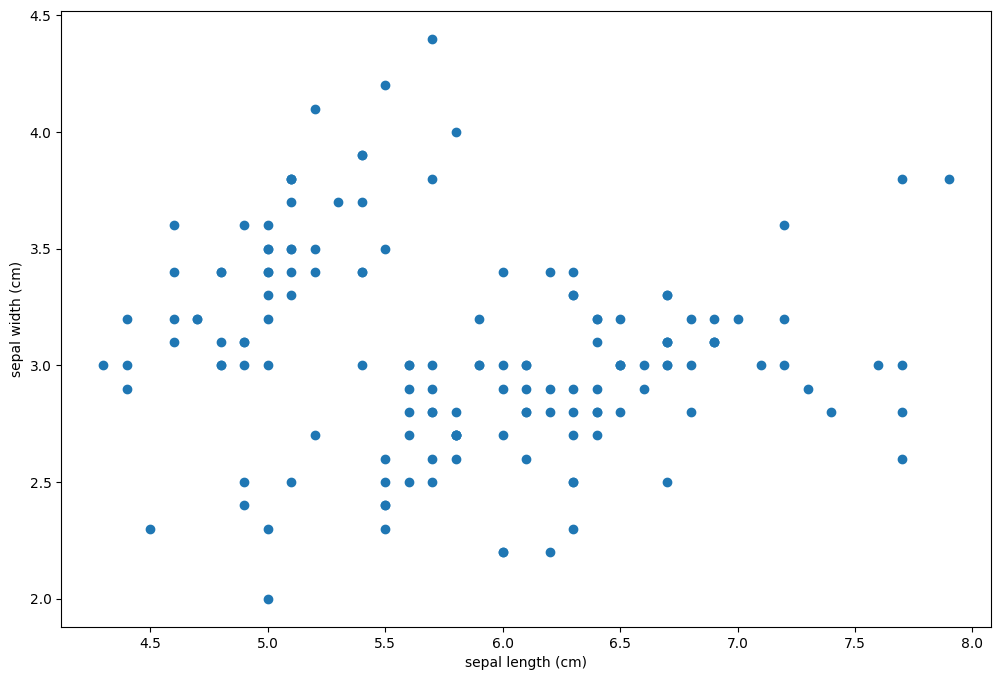

In [21]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(X['sepal length (cm)'], X['sepal width (cm)'])

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

Text(0, 0.5, 'iris type')

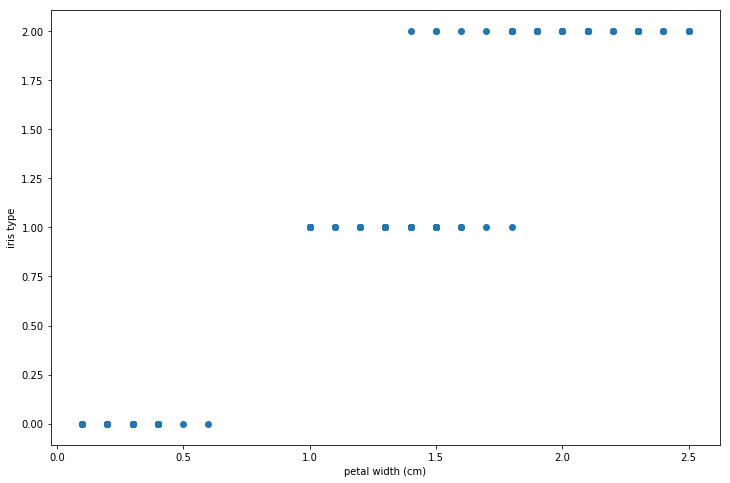

In [ ]:
fig, ax = plt.subplots(figsize = (12, 8))

plt.scatter(X['petal width (cm)'], pd.DataFrame(data = y))

plt.xlabel('petal width (cm)')
plt.ylabel('iris type')

Text(0, 0.5, 'iris type')

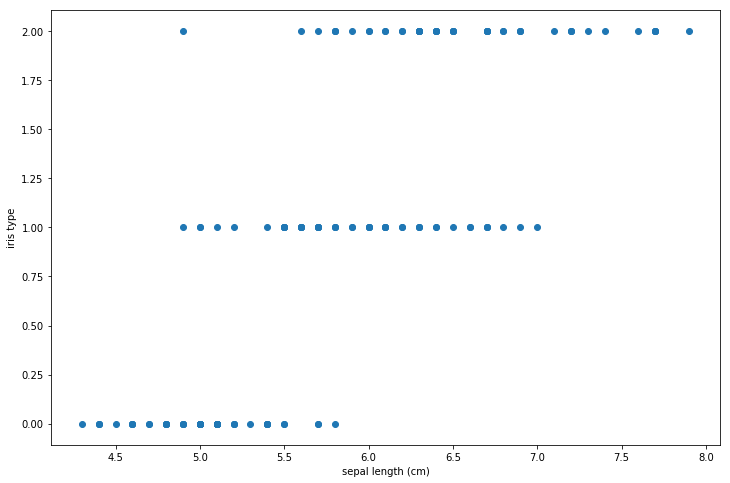

In [ ]:
fig, ax = plt.subplots(figsize = (12, 8))

plt.scatter(X['sepal length (cm)'], pd.DataFrame(data = y))

plt.xlabel('sepal length (cm)')
plt.ylabel('iris type')

In [22]:
iris_corr = X.corr()

iris_corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


<Axes: >

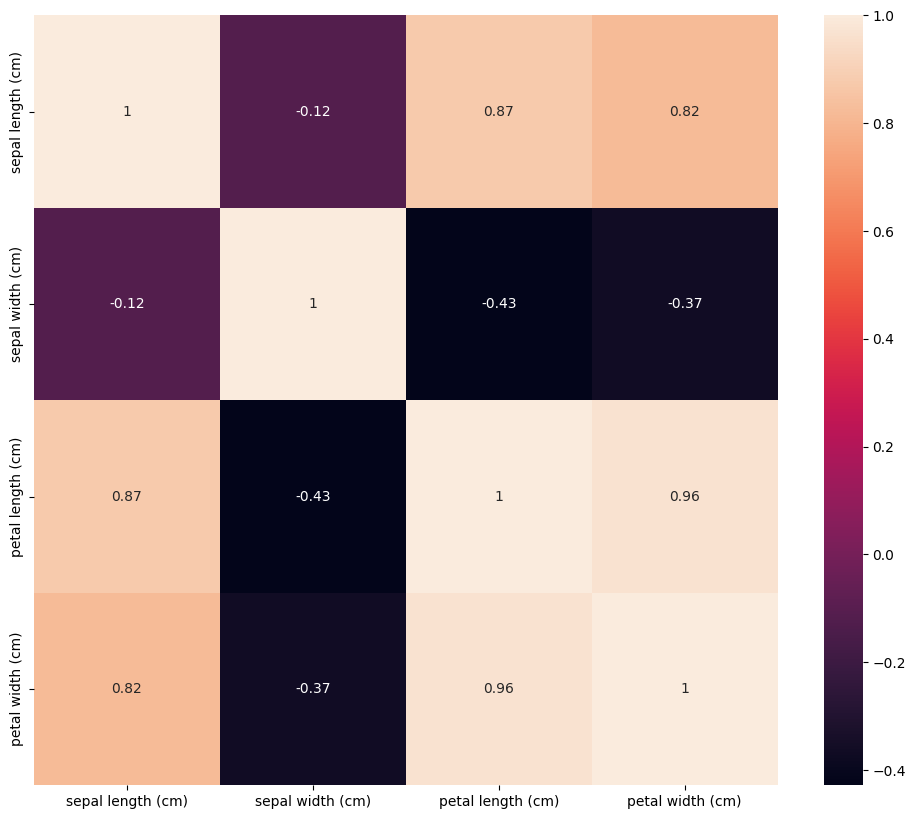

In [23]:
fig, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(iris_corr, annot = True)

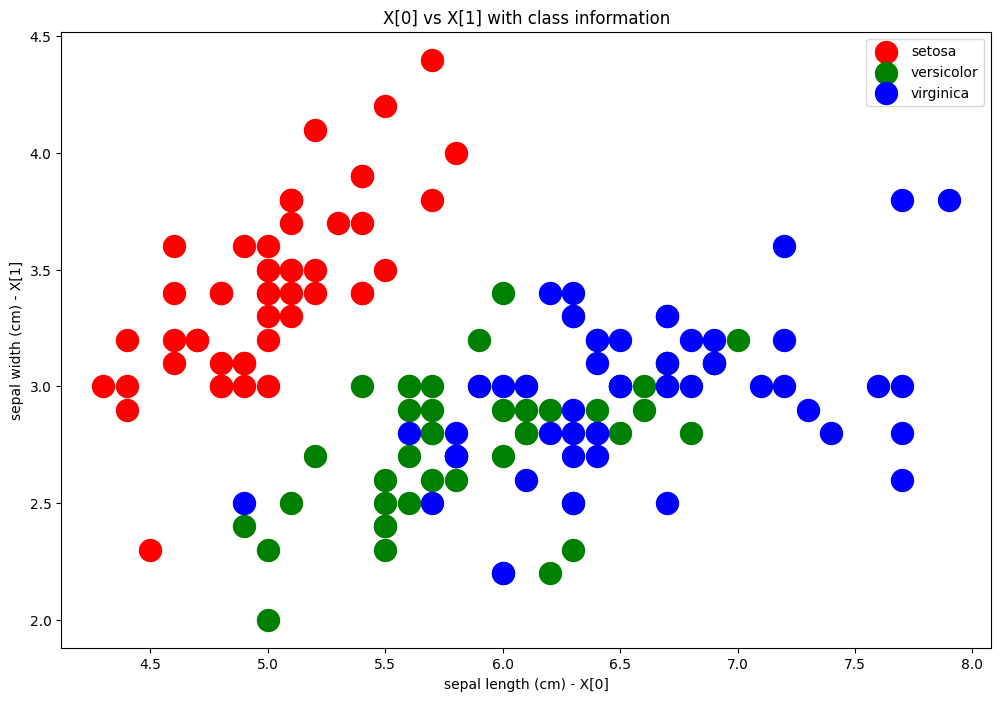

In [24]:
fig, ax = plt.subplots(figsize=(12, 8))

x = np.array(X)

for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    plt.scatter(x[y == i, 0], x[y == i, 1], c = c, s=250, label = target_name)

plt.title('X[0] vs X[1] with class information')
plt.xlabel('sepal length (cm) - X[0]')
plt.ylabel('sepal width (cm) - X[1]')

plt.legend()
plt.show()

### Perform LDA

https://scikit-learn.org/0.16/modules/generated/sklearn.lda.LDA.html

In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components = 2)

In [27]:
X_new = lda.fit_transform(X, y)

In [28]:
lda.explained_variance_ratio_

array([0.9912126, 0.0087874])

In [29]:
X_new.shape

(150, 2)

In [31]:
X_new = pd.DataFrame(X_new)

X_new.head()

,0,1
0,8.061800,-0.300421
1,7.128688,0.786660
2,7.489828,0.265384
3,6.813201,0.670631
4,8.132309,-0.514463


## Visualize Results

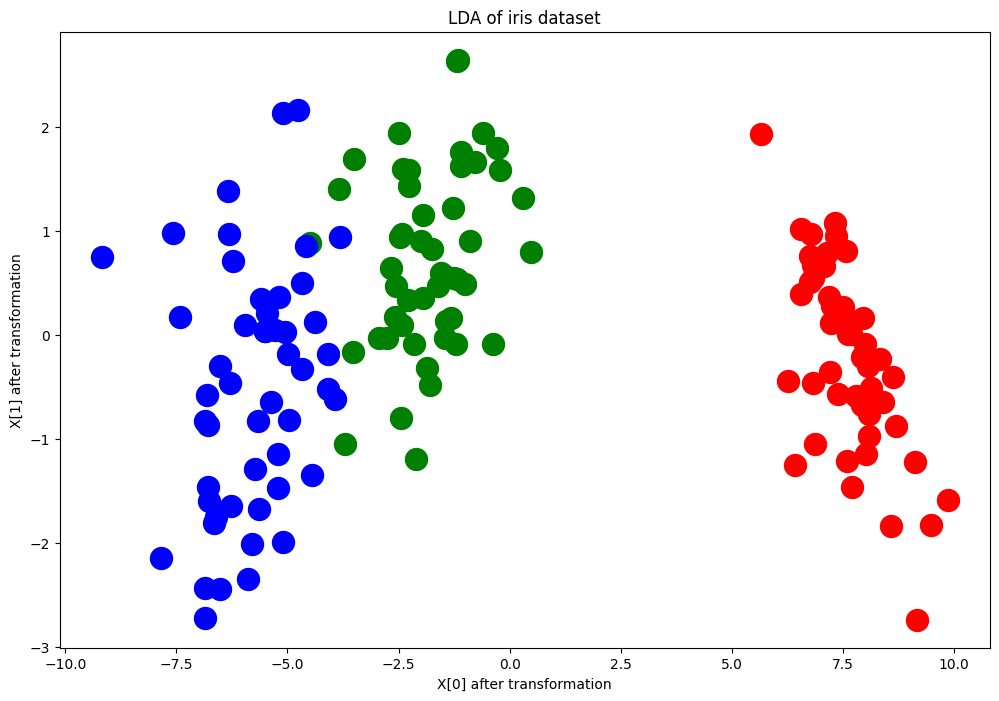

In [32]:
fig, ax = plt.subplots(figsize = (12, 8))

x_new = np.array(X_new)

for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    plt.scatter( x_new[y == i, 0], x_new[y == i, 1], c = c, s=250, label = target_name)


plt.title('LDA of iris dataset')
plt.xlabel('X[0] after transformation')
plt.ylabel('X[1] after transformation');
plt.show()

In [33]:
lda_corr = X_new.corr()

lda_corr

,0,1
0,1.000000e+00,7.529626e-16
1,7.529626e-16,1.000000e+00


In [34]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver = 'liblinear', multi_class='auto')

model.fit(X, y)

model.score(x, y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.96

In [35]:
model = LogisticRegression(solver = 'liblinear', multi_class='auto')

model.fit(X_new, y)

model.score(X_new, y)

0.9333333333333333